In [1]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians

# !pip install gmaps
import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from ipywidgets.embed import embed_minimal_html
import webbrowser
import geoCNN

DATADIR = "/home/nirvan/Desktop/github/GeoguessrAI/infoExtraction/data"
MODELDIR = "/home/nirvan/Desktop/github/GeoguessrAI/machineLearning"

In [2]:
TF = np.load(DATADIR+'/trainFiles.npy')
TESF = np.load(DATADIR+'/testFiles.npy')
print("Train files: {}, Test files: {}".format(len(TF), len(TESF)))

Train files: 27702, Test files: 1458


243


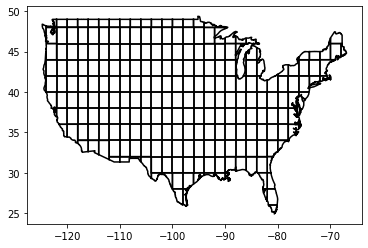

In [3]:
usaPolyGrid = pickle.load(open("/home/nirvan/Desktop/github/GeoguessrAI/infoExtraction/usaPolyGrid.pkl",'rb'))
for i in usaPolyGrid.values():
    plt.plot(i[:,1],i[:,0], color='black')
print(len(usaPolyGrid))

In [4]:
m = geoCNN.Geoguessr.load(MODELDIR + '/model_40.h5')

Loading model from /home/nirvan/Desktop/github/GeoguessrAI/machineLearning/model_40.h5
Loaded model accuracy 40
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 10, 19, 2048)      23587712  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 17, 64)         1179712   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 8, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               262272    
________

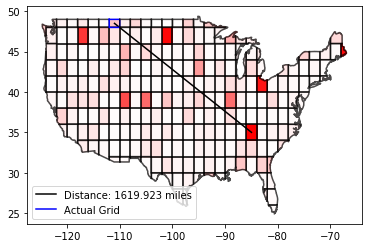

1619.9234147728132

In [5]:
i = 0
m.predictSingle(DATADIR+"/dataCombined/"+TF[i], ployGrid=usaPolyGrid, expected=int(TF[i].split('+')[0]))

In [6]:
m.evaluate([DATADIR+"/dataCombined/"+i for i in TESF[:50]], np.array(list(map(lambda x: int(x.split('+')[0]),TESF[:50]))), usaPolyGrid)

Evaluated 0 out of 50 points


1211.3458872787921

In [19]:
xTest = TF[:10]
yTest = np.array(list(map(lambda x: int(x.split('+')[0]),xTest)))
g = m.dataGen(xTest, yTest, DATADIR+"/dataCombined/", batchSize=1)

In [20]:
xx,yy,_ = next(g)
yp = m.model.predict(xx)[0]
np.argmax(yp),np.argmax(yy[0])

(193, 60)

In [21]:
yn = list(map(lambda x:x/max(yp), yp))

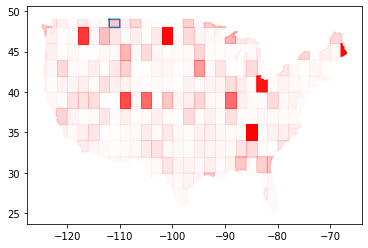

In [22]:
plt.plot(usaPolyGrid[np.argmax(yy[0])][:,1],usaPolyGrid[np.argmax(yy[0])][:,0])
for k,i in usaPolyGrid.items():
    plt.fill(i[:,1],i[:,0],color='red', alpha=yn[k])

In [5]:
m = geoCNN.Geoguessr()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 10, 19, 2048)      23587712  
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 17, 64)         1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
m.fit(trainFiles = TF[0:500], 
      dataDir = DATADIR+"/dataCombined/", 
      saveFolder = MODELDIR)

Getting data from directory: /home/nirvan/Desktop/github/GeoguessrAI/infoExtraction/data/dataCombined/
Using 485 for training and 15 for validation
Train for 5 steps, validate for 1 steps
Epoch 1/20
4/5 [=======================>......] - ETA: 2s - loss: 9.7287 - accuracy: 0.0000e+00 
Saving model with accuracy 0 at /home/nirvan/Desktop/github/GeoguessrAI/machineLearning
5/5 [==============================] - 16s 3s/step - loss: 9.5294 - accuracy: 0.0000e+00 - val_loss: 5.6590 - val_accuracy: 0.0000e+00
Epoch 2/20
4/5 [=======================>......] - ETA: 2s - loss: 5.8984 - accuracy: 0.0250
Saving model with accuracy 0 at /home/nirvan/Desktop/github/GeoguessrAI/machineLearning
5/5 [==============================] - 13s 3s/step - loss: 5.9520 - accuracy: 0.0200 - val_loss: 5.5455 - val_accuracy: 0.0000e+00
Epoch 3/20
4/5 [=======================>......] - ETA: 2s - loss: 5.6958 - accuracy: 0.0000e+00
Saving model with accuracy 0 at /home/nirvan/Desktop/github/GeoguessrAI/machineLearni

KeyError: 'val_accuracy'

In [9]:
m.save(DATADIR+"/dataCombined/")


Saving model with accuracy 0 at /home/nirvan/Desktop/github/GeoguessrAI/infoExtraction/data/dataCombined/


In [10]:
Xfiles = np.load(DATADIR+'/dataCombFileNames.npy')
trainFiles = Xfiles[:int(len(Xfiles)*0.95)]
np.save('trainFiles.npy',trainFiles)
testFiles = Xfiles[int(len(Xfiles)*0.95):]
np.save('testFiles.npy',testFiles)